# FALL IE 423 - PROJECT PART 1 CODE & REPORT
### EYLÜL RANA SARAÇ
### MERVE NUR HÜNDÜR
### HATİCE EDA YILMAZ

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

After importing the necessary libraries, we read the wide format of the csv file into a Pandas DataFrame we created called "df_w". Then, we converted "timestamp" column, which is an object column to datetime format by using pd.to_datetime() function. Lastly, we sorted the rows of df_w according the "timestamp" column in ascending order. 

In [2]:
df_w = pd.read_csv("all_ticks_wide.csv")
df_w["timestamp"] = pd.to_datetime(df_w["timestamp"])
df_w = df_w.sort_values(by="timestamp")

Then, we created a function called Find_Outliers() which returns the outliers of a given dataframe. The function takes a dataframe of two columns as input, one being the "timestamp" and other being the column we want to find outliers of, finds the outliers for the second column by first calculating the mean and standart deviation, then creating the lower and upper 3-sigma limits by a simple formula, then iterating through the second column of the dataframe to find values that are higher than the upper limit or lower than the lower limit, lastly, it returns a dictionary called "outliers" which includes both lower and higher outliers. 

In [3]:
def Find_Outliers(df):
        mean = df.iloc[:,1].mean()
        std = df.iloc[:,1].std()
        upper_limit = mean + 3*std
        lower_limit = mean - 3*std
        lower_outliers = df[df.iloc[:,1] < lower_limit]
        higher_outliers = df[df.iloc[:,1] > upper_limit]
        outliers = {"lower_outliers" : lower_outliers, "higher_outliers" : higher_outliers }
        
        return outliers

Since we need to calculate the monthly outliers, we had to divide df_w into monthly dataframes. So, we created a new function called "Monthly_Data" which takes a dataframe, and a tuple key that indicates the exact year and month of that dataframe is needed as input, and returns the new dataframe. For instance, when the function is called as Monthly_Data(df = df_w, key = (2017,3)), it will return a new dataframe consisting of all the columns in df_w in 3rd month of 2017.

In [4]:
def Monthly_Data(df, key):
    df_Monthly_dictionary = {}
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df_yearly = df["timestamp"].dt.year
    for i in range(2012,2020):
        df_current_year = df.loc[df_yearly == i]
        df_current_year_monthly = df_current_year["timestamp"].dt.month
        for k in range(1,13):
             df_Monthly_dictionary[i,k] = df_current_year.loc[df_current_year_monthly == k]
    
    return df_Monthly_dictionary.get(key)

Next, we created the function Find_Outliers_Column_Month() which combines the functions Find_Outliers() and Monthly_Data(). Given the inputs that are a dataframe, column_name, and a key, Find_Outliers_Column_Month() returns a dictionary consisting of all the outliers of the given stock in that certain year and month. For example, when the function is called as Find_Outliers_Column_Month(df = df_w, column_name = "CEMAS", key = (2016, 5)), it returns the outliers of the stock data of CEMAS in the 5th month of 2016.

As our given data had several null values, we interpolated them by the Pandas DataFrame.interpolate() function. This function fills the null values by taking the average of values before and after the null value.

In [8]:
def Find_Outliers_Column_Month(df,column_name,key):
    df_column = df.loc[:,["timestamp",column_name]]
    df_column_without_null = df_column.interpolate()
    df_column_monthly = Monthly_Data(df_column_without_null, key)
    return Find_Outliers(df_column_monthly)

# Find_Outliers_Column_Month(df_w,column_name = "CEMAS", key = (2017,2))

{'lower_outliers': Empty DataFrame
 Columns: [timestamp, CEMAS]
 Index: [],
 'higher_outliers':                       timestamp  CEMAS
 30467 2017-02-02 06:45:00+00:00   1.73}

Lastly, we created the function Create_Graph that takes a dataframe, column_name, and a key as input, and creates a line graph of the given stock at the given year and month. For instance, if the function is called as Create_Graph(df_w,column_name = "YATAS", key = (2017,9)), it draws a line graph in which has the values of CEMAS in 9th month of 2017 on y-axis, and "timestamp" on the x-axis. We also added three dotted lines on each graph, the green one representing the mean of the values, and the red ones representing the 3-sigma limits. 

In [6]:
def Create_Graph(df,column_name,key):
    df_column = df.loc[:,["timestamp",column_name]]
    df_column_without_null = df_column.interpolate()
    df_column_monthly = Monthly_Data(df_column_without_null, key)
    plt.plot_date(df_column_monthly["timestamp"], df_column_monthly[column_name],fmt=",-")
    plt.gcf().autofmt_xdate()
    plt.axhline(y = df_column_monthly[column_name].mean(), color = 'g', linestyle = '--')
    plt.axhline(y = df_column_monthly[column_name].mean() + 3*df_column_monthly[column_name].std(), color = 'r', linestyle = '--')
    plt.axhline(y = df_column_monthly[column_name].mean() - 3*df_column_monthly[column_name].std(), color = 'r', linestyle = '--')
    plt.xlabel("Timestamp")
    plt.ylabel(column_name) 

#Create_Graph(df_w,column_name = "CEMAS", key = (2018,3))

In [7]:
def Create_Multiple_Graphs(df,column_name, year):
    df_column = df.loc[:,["timestamp",column_name]]
    df_column_without_null = df_column.interpolate()
    
    fig, ax_array = plt.subplots(nrows=3, ncols=4, figsize=(20, 16))
    
    i = 1
   
    for ax in ax_array.flatten():
        key = (year,i)
        df_column_monthly = Monthly_Data(df_column_without_null, key)
        ax.plot_date(df_column_monthly["timestamp"], df_column_monthly[column_name],fmt=",-")
        
        ax.axhline(y = df_column_monthly[column_name].mean(), color = 'g', linestyle = '--')
        ax.axhline(y = df_column_monthly[column_name].mean() + 3*df_column_monthly[column_name].std(), color = 'r', linestyle = '--')
        ax.axhline(y = df_column_monthly[column_name].mean() - 3*df_column_monthly[column_name].std(), color = 'r', linestyle = '--')
        
        ax.set_xlabel("Timestamp")
        ax.set_ylabel(column_name)
        
        ax.set_xticks(ax.get_xticks())  
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')  

        i = i + 1
    

#Create_Multiple_Graphs(df_w,column_name = "CEMAS", year = 2017)

# ANALYSIS OF STOCK PRICES
We analyzed PETKM, EREGL and FROTO shares over a 25-month period from June 2017 to July 2019. With the functions we introduced above, we specifically investigated the dates when the share values took outlier values and tried to identify the reasons. In addition, we also analyzed the Google Trends data associated with the shares and tried to show the parallels with the share values.

## PETKM
Petkim is a leading petrochemical company in Turkey that produces a wide range of basic petrochemical products. Established in 1965, it supplies raw materials for various industries, including plastics, detergents, textiles, construction, automotive, electronics, packaging, paint, cosmetics, and agriculture. Its product line includes polyethylene, polypropylene, PVC (polyvinyl chloride), raw materials for detergents, various solvents, and other chemical substances. Petkim operates Turkey's first and only integrated petrochemical complex located in Aliağa, Izmir, and markets its products domestically and internationally.

**16.08.2017**

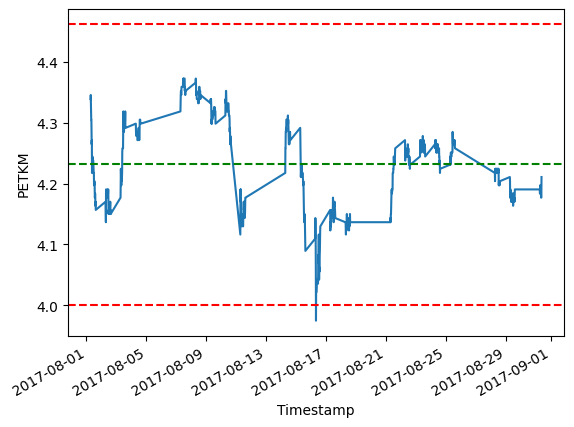

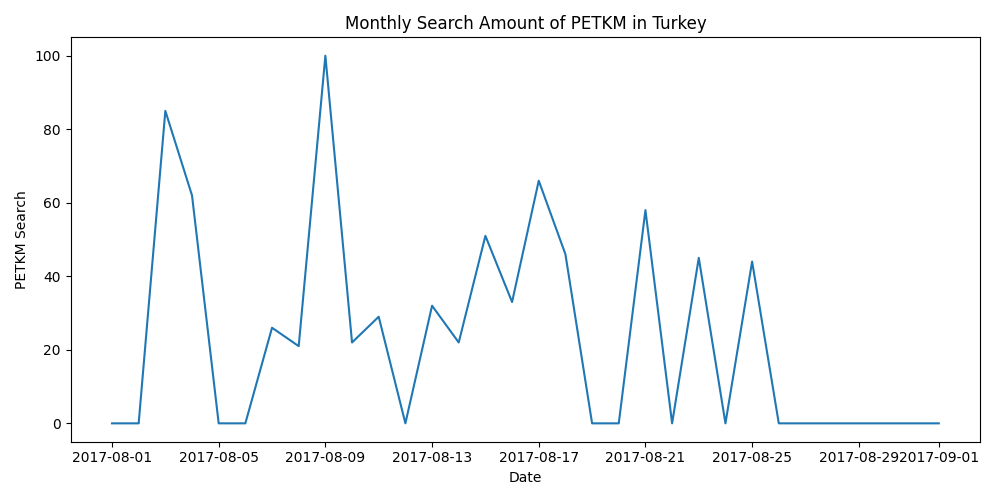

On the same day (16.08.2017) that the share price fell, as seen as an outlier in the first graph, news broke that the Petrol-Is Union demanded the reinstatement of dismissed employees at Petkim. Stating that the attitudes and behavior of some Petkim executives should be reviewed, the union said that it was unlawful to dismiss without just cause. The fact that the company was subjected to such criticism by the union must have lowered its reputation in the eyes of the public, which in turn lowered its share prices.
[https://uzmanpara.milliyet.com.tr/raporlar-analizler/petrol-is-sendikasi--petkimde-is-akitleri-fesh-edilenlerin-ise-iadesini-talep-etti/926460/]

On the other hand, it is seen in google trends data that the search for the word PETKM is above normal both when the value of the share increases and when it decreases. This is an expected situation, as both the decline and exit situations related to stocks are closely related to investors.

-----------------------

**10.09.2018**
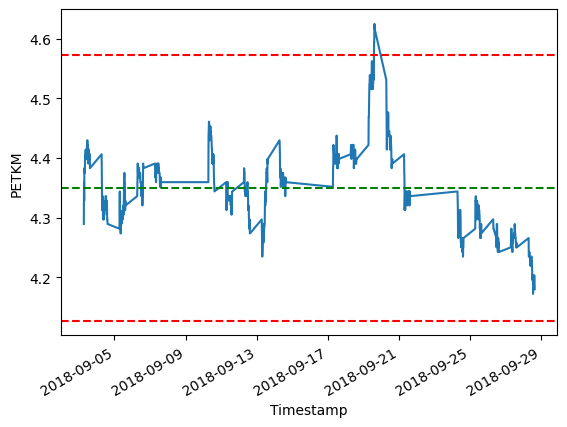

In the statement made on the evening when the share price rose, it was reminded of the previous sales contract between SOCAR and STAR Refinery and it was announced that the necessary tests were started to start the operation of this refinery. As is often the case, new plant purchases and production increases seem to have caused the share price of the relevant company to rise.
[https://tr.investing.com/news/stock-market-news/star-rafinerisinin-devreye-alnmas-icin-testlere-basland-devir-bedelinin-2-taksidi-30-eylule-kadar-odenecekpetkimkap-534504]

-----------------------

**03.06.2019**

![PETKM 2019-6.png](<attachment:PETKM 2019-6.png>)

On the day PETKM's share price fell, SOCAR Turkey's manager announced that the company will also buy oil from Iraq starting next month. Usually this kind of news is news of growth and increase in share value, but perhaps Iraq does not seem to be a reliable investment and may have reduced the reliability and value of the share.
[https://uzmanpara.milliyet.com.tr/raporlar-analizler/socar-turkiyegahramanov-gelecek-aydan-itibaren--irak-petrolu-de-almaya-basliyoruz-hurriyet/1347121/]

## EREGL
Erdemir, established in 1960 and privatized in 2006, is Turkey's leading flat steel producer and operates under the OYAK Group. It is a significant entity in the Borsa İstanbul, trading under the ticker "EREGL." The company is integral to the economy of Karadeniz Ereğli, where it is based, and maintains two ports for its operations.

**29.06.2017**
![EREGL 2017-6.png](<attachment:EREGL 2017-6.png>)

In a news article published the day before the outlier seen in the above graph, it was stated that EREGL shares, as well as some other companies, will be offered for sale on the stock exchange after applications to the Central Registry Agency within the framework of the rules set by the Capital Markets Board.
[https://uzmanpara.milliyet.com.tr/kap-haberi/ascel-halks-eregl-ybtas-merkezi-kayit-kurulusu-a-s--borsada-islem-goren-tipe-donusum-duyurusu/892846/]

-----------------------
**03.01.2018**

![EREGL 2018-1.png](<attachment:EREGL 2018-1.png>)

On the second and third of the month, many investment companies published BIST and stock analyzes, and EREGL stock was described as reliable by trusted investment institutions such as Şeker Yatırım. This naturally increased the value of the stock in the eyes of investors and made it popular.
[https://uzmanpara.milliyet.com.tr/kap-haberi/seker-yatirim--erdemir-icin-8-30-tl-hedef-fiyat-ile-tut-tavsiyesini-surdurdu/1009836/]

-----------------------

**03.09.2018**

![EREGL 2018-9.png](<attachment:EREGL 2018-9.png>)

![EREGL GT 18-9.png](<attachment:EREGL GT 18-9.png>)

In the beginning of September 2018, EREGL stocks skyrocketed again, but we could not found any meaningful news that may resulted in those high prices. Google Search trends also didn't give any clue about this for this case.

## FROTO
Ford Otosan is a leading Turkish automotive manufacturer, established in 1959 and a joint venture between Koç Holding and Ford since 1997. It's a major exporter and producer of commercial vehicles and engines in Turkey, with significant contributions to Ford's global operations. As of 2021, it's recognized for producing Turkey's first indigenous transmission and has committed to a significant investment in its production facilities.

**27.09.2017**
![FROTO 2017-9.png](<attachment:FROTO 2017-9.png>)

The news that appeared on a news website in the afternoon of 26.09.2017, one day before the upper outlier, gives an idea about the reason for this outlier. According to the news; Bizim Menkul Değerler, an investment firm, stated that Ford Otosan's export performance was strong, while domestic sales declined. The target price of the company was raised from 35.36 TL to 52.62 TL.
[https://uzmanpara.milliyet.com.tr/raporlar-analizler/hisse-degerlendirmesi-bizim-menkul--ford-otosan-hedef-fiyatini-35-36-tlden-52-62-tlye-yukseltti/946498/]

-----------------------

**09.11.2017**

![FROTO 2017-11.png](<attachment:FROTO 2017-11.png>)

According to a news that came out on the same day Outlier was seen; Otokoç Bursa, Turkey's largest automotive retailer, won the "Excellence in Sales Award" for Ford Otosan's sales performance evaluation in the 3rd quarter of 2017. This award seems to have drawn attention to FROTO shares again and increased their share value.
[https://uzmanpara.milliyet.com.tr/raporlar-analizler/basin-bulteni-otokoc-bursa--satista-mukemmellik-odulunun-sahibi-oldu/978210/]

-----------------------

**28.03.2018**

![FROTO 2018-3.png](<attachment:FROTO 2018-3.png>)

According to a news report on the day the share price rose; Ford Otomotiv Sanayi A.Ş. (FROTO) decided to distribute cash dividends to its Group A shareholders with a high dividend rate of 193.80%. Similar dividends were envisaged for Group B and C shares. Since high dividend payments are very attractive for investors, it is not surprising that the announcement of this decision has a strong impact on the share price.
[https://uzmanpara.milliyet.com.tr/kap-haberi/froto-ford-otomotiv-sanayi-a-s--kar-payi-dagitim-islemlerine-iliskin-bildirim/1072275/]

-----------------------

![FROTO 2018-6.png](<attachment:FROTO 2018-6.png>)

![FROTO 2018-8.png](<attachment:FROTO 2018-8.png>)

In the last days of June and August 2018, FROTO stock's prices increased again as seen in the above graphs; but we we found no explanatory data about these. But we do see an increasing saerch trend about the stock, while the stock price increases especially at the end of June. This again shows the correlation between the search trends and stock prices.

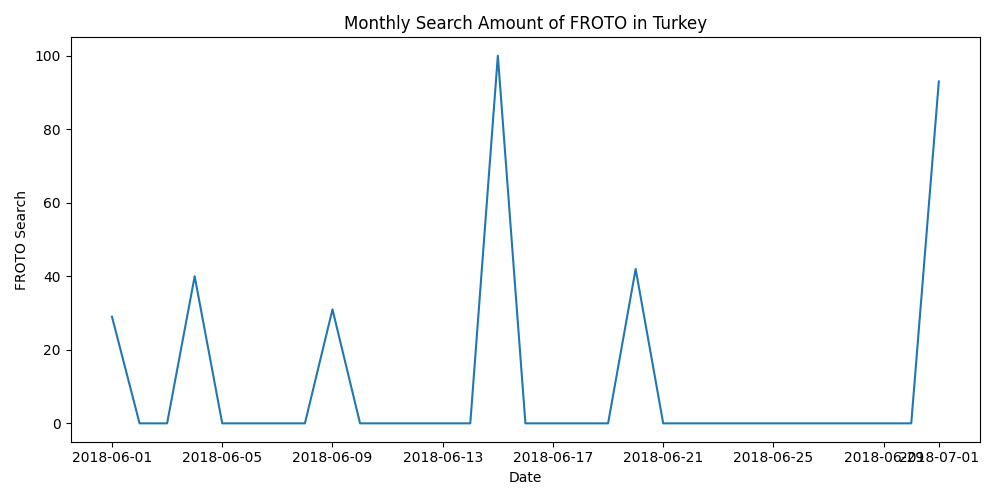

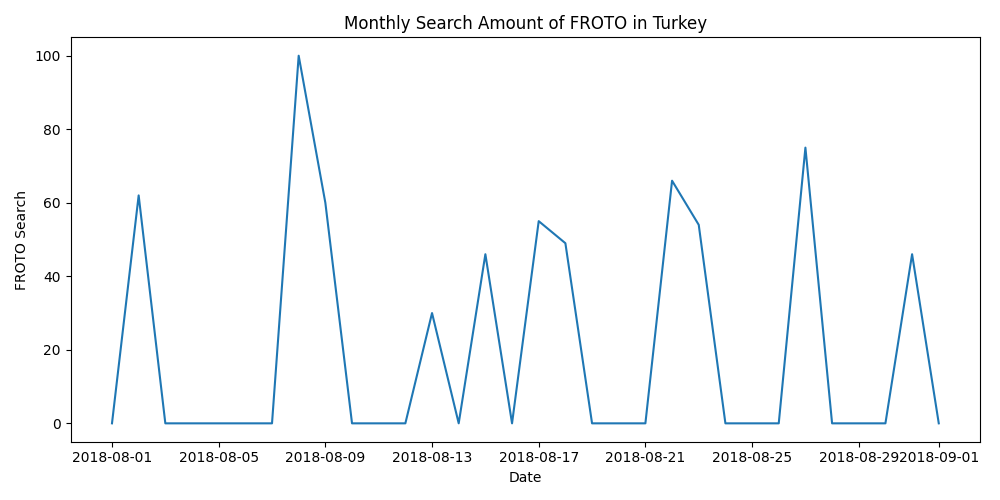



## AKSA

Aksa Akrilik is a Turkey-based firm that focuses on energy solutions, encompassing the manufacturing of diverse generators and power systems. Boasting a widespread international footprint, the company has earned recognition for its dependable offerings and unwavering dedication to fostering innovation and promoting sustainability within the energy domain.

During the thorough analysis of AKSA's stock price data spanning the period from 2017 to 2019, several monthly outliers are uncovered. Notably, in April 2018,  20 instances of lower outliers were identified, all of which were dated 2018-04-30. The specific data points are outlined below:

2018-04-30 09:00:00+00:00  12.4420

2018-04-30 09:30:00+00:00  12.4420

2018-04-30 09:45:00+00:00  12.3975

2018-04-30 10:45:00+00:00  12.3975

2018-04-30 11:00:00+00:00  12.3619

2018-04-30 11:15:00+00:00  12.3175

2018-04-30 11:30:00+00:00  12.3086

2018-04-30 11:45:00+00:00  12.3175

2018-04-30 12:00:00+00:00  12.2908

2018-04-30 12:15:00+00:00  12.2908

2018-04-30 12:30:00+00:00  12.2730

2018-04-30 12:45:00+00:00  12.2730

2018-04-30 13:00:00+00:00  12.2196

2018-04-30 13:15:00+00:00  12.1040

2018-04-30 13:30:00+00:00  12.1663

2018-04-30 13:45:00+00:00  12.1307

2018-04-30 14:00:00+00:00  12.0951

2018-04-30 14:15:00+00:00  12.0862

2018-04-30 14:30:00+00:00  11.8105

2018-04-30 14:45:00+00:00  11.6860

2018-04-30 15:00:00+00:00  11.8283


##### Plotted Data 
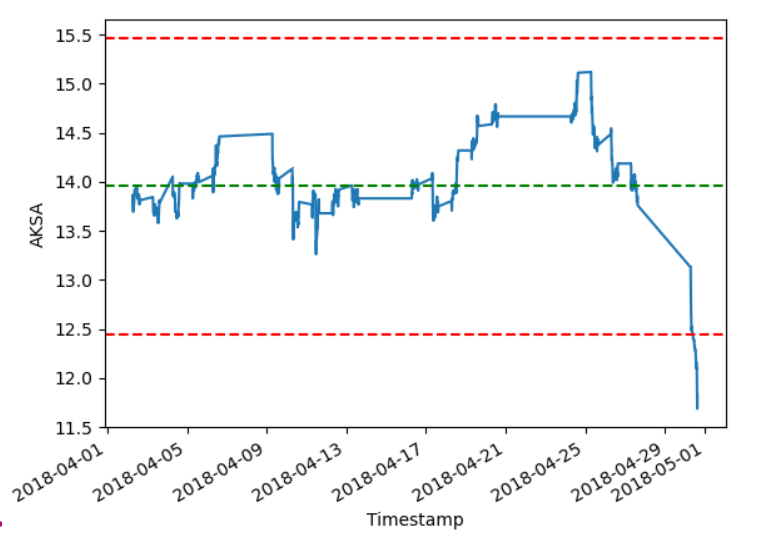
##### Google Trend Data 
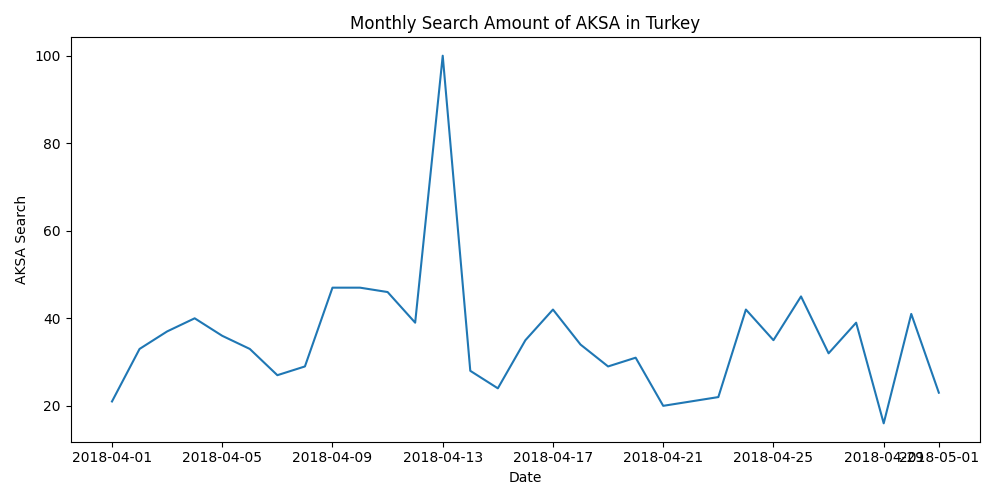

On April 30th,  AKSA's reported net profit of 52 million TL, which reflects a 26% growth rate in the first quarter of 2018, and the market's expectations, particularly falling short of Ak Yatırım's projected 65 million TL. Notably, the absence of an average market expectation further complicates the analysis.

The lower-than-anticipated net profit, attributed primarily to 34 million TL in net financial expenses rather than the projected 19 million TL, could potentially create a negative sentiment among investors. This discrepancy suggests that AKSA's financial management might be facing challenges, leading to concerns about the company's overall financial health and stability.

Consequently, this development could trigger a decline in investor confidence, potentially resulting in a downward pressure on AKSA's stock prices. Investors might perceive the company as having potentially weaker financial performance and, subsequently, may decide to sell their shares, leading to a decrease in demand and a corresponding decrease in stock prices. Additionally, the market's reaction could signal a lack of trust in the company's ability to meet future earnings expectations, thereby dampening investor sentiment and confidence in the company's long-term prospects below.

In May 2018, 1 lower and 3 higher outliers were observed. The data points are as follows:

The lower outlier:

2018-05-09 06:45:00+00:00  9.3381

Aksa Akrilik Kimya's recent announcement of a share buyback program, as stated in their disclosure to the Capital Markets Board, can have a noteworthy influence on the company's stock prices, possibly resulting in a decrease in value. The decision made by the company's Board of Directors to repurchase its own shares without any predefined limits or price constraints could be interpreted in various ways, leading to potential impacts on investor sentiment and, consequently, the stock price.
Share buyback initiatives are often perceived as a signal that a company considers its shares undervalued. However, if the company's overall financial performance or market outlook is not favorable, this move might be viewed with skepticism, potentially leading to a decrease in stock prices. Moreover, concerns may arise regarding the allocation of capital, as the funds used for buybacks could have been invested in growth opportunities. If investors interpret this as a prioritization of short-term gains over long-term growth, it could negatively impact stock prices.

The higher outliers:

2018-05-02 06:45:00+00:00  11.8728

2018-05-02 07:00:00+00:00  11.5882

2018-05-02 07:15:00+00:00  11.5971


Regarding the recent rise in the company's stock prices, the company made an announcement stating that there were no undisclosed extraordinary circumstances that they had anticipated could lead to such an increase. However, the company has not provided sufficient information to the public to fully explain the reasons behind the movement in the stock price.


##### Plotted Data
![Ekran görüntüsü 2023-11-02 231853.png](<attachment:Ekran görüntüsü 2023-11-02 231853.png>)
##### Google Trend Data
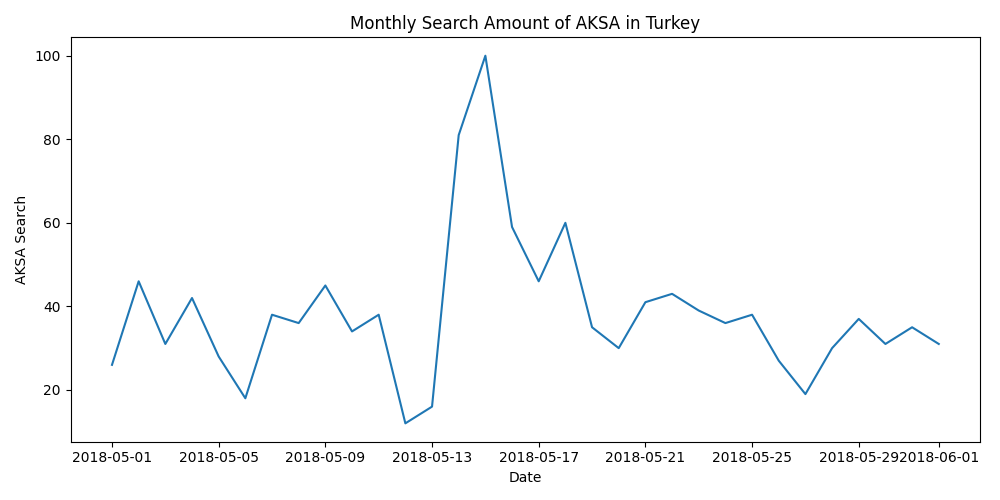

## Turkey Bottle and Glass Factories

Turkey Bottle and Glass Factories, commonly known as Şişecam, is a Turkey-based glass and industrial raw materials manufacturer. Şişecam is a well-established organization operating globally in many countries, producing a range of industrial raw material products such as glass and glass products, chemicals, soda, and chlorine.
During the thorough analysis of Şişecam's stock price data spanning the period from 2017 to 2019, several monthly outliers are uncovered. Notably, in September 2019, we identified a higher outlier, which were dated 2017-09-05. The specific data point is outlined below:

2017-09-05 06:45:00+00:00  4.146




##### Plotted Data 
![Ekran görüntüsü 2023-11-02 233532.png](<attachment:Ekran görüntüsü 2023-11-02 233532.png>)
##### Google Trend Data
![Ekran görüntüsü 2023-11-02 233954.png](<attachment:Ekran görüntüsü 2023-11-02 233954.png>)

It is observed that the stock, which rose above the channel in the middle of August, attempted to re-enter the lower band of the channel with support from its 100-day average. The stock has also risen above its 20 and 50-day averages, with strong momentum in the indicators. The RSI is showing a positive outlook above the 50 level, while the MACD is attempting to rise above the zero line again.



On April 30, lower outliers were observed. The data points are as follows:

2018-04-30 14:30:00+00:00  4.1367

2018-04-30 14:45:00+00:00  4.2116

2018-04-30 15:00:00+00:00  4.2210



##### Plotted Data
![Ekran görüntüsü 2023-11-02 234920.png](<attachment:Ekran görüntüsü 2023-11-02 234920.png>)
##### Google Trend Data
![Ekran Alıntısı.PNG](<attachment:Ekran Alıntısı.PNG>)

On the relevant date, the Capital Markets Board approved the debt instrument issuance of Turkey Bottle and Glass Factories (Turkiye Şişe ve Cam Fabrikalari A.Ş.). As per the decision in the CMB weekly bulletin, the Company is set to sell bonds/financial bills with a specified issuance ceiling of $750 million abroad. Such debt endeavors can heighten the investment risk for investors, potentially resulting in a decline in the stock value.

On June 12, higher outliers were observed. The data points are as follows:

2018-06-12 07:15:00+00:00  4.3704

2018-06-12 07:30:00+00:00  4.3704

2018-06-12 07:45:00+00:00  4.3607



##### Plotted Data
![Ekran Alıntısı2.PNG](<attachment:Ekran Alıntısı2.PNG>)
##### Google Trends Data
![Ekran Alıntısı5.PNG](<attachment:Ekran Alıntısı5.PNG>)

On September 6, a higher outlier observed.The data point is as follows:   

2018-09-06 09:15:00+00:00  6.3235



##### Plotted Data
![Ekran Alıntısı10.PNG](<attachment:Ekran Alıntısı10.PNG>)

##### Google Trends Data
![Ekran Alıntısı20.PNG](<attachment:Ekran Alıntısı20.PNG>)

On September 6th, 2018, the announcement of the implementation of the fourth furnace at the Mersin Glass Packaging Factory represented a significant expansion of Şişecam's investments in Turkey. With an expected investment of approximately $18.2 million, Şişecam Cam Ambalaj, a subsidiary of the Şişecam Group, is poised to increase its annual production capacity by 80,000 tons. This news likely instilled a positive outlook among investors, potentially contributing to an upswing in Şişecam's stock value. The company's demonstrated commitment to bolstering its production capabilities was likely perceived as an encouraging sign for future growth and profitability, fostering investor confidence and buoying Şişecam's stock performance.

On November 1, a lower outlier observed.The data point is as follows:   

2018-11-01 13:45:00+00:00  4.5444



##### Plotted Data
![Ekran Alıntısı34.PNG](<attachment:Ekran Alıntısı34.PNG>)
##### Google Trend Data
![Ekran Alıntısı345.PNG](<attachment:Ekran Alıntısı345.PNG>)

On December 31, higher outliers were observed. The data points are as follows:

2018-12-31 12:45:00+00:00  5.5210

2018-12-31 13:00:00+00:00  5.5500

2018-12-31 13:15:00+00:00  5.5790

2018-12-31 13:30:00+00:00  5.5886

2018-12-31 13:45:00+00:00  5.6080

2018-12-31 14:00:00+00:00  5.5596

2018-12-31 14:15:00+00:00  5.5500

2018-12-31 14:45:00+00:00  5.5596



##### Plotted Data
![Ekran Alıntısı546.PNG](<attachment:Ekran Alıntısı546.PNG>)
##### Google Trend Data
![Ekran Alıntısı78.PNG](<attachment:Ekran Alıntısı78.PNG>)

The increase in Şişecam's stock can be attributed to the company's share buyback and the purchase of shares related to Turkey Şişe ve Cam Fabrikaları A.Ş. On December 31, 2018, the purchase transaction resulted in Şişecam reaching a 67.11% stake in Turkey Şişe ve Cam Fabrikaları A.Ş. This development likely enhanced Şişecam's control over the company and might have increased investor confidence. Investors may have responded positively to Şişecam's strengthened control position and increased market confidence, leading to heightened demand for Şişecam's stock and a subsequent rise in its stock value.

## Akbank 

Akbank T.A.S. is one of the leading banks in Turkey, offering a wide range of financial services to individuals, commercial enterprises, and corporate clients. With a strong presence in the Turkish banking sector, Akbank is known for its innovative solutions, customer-centric approach, and technological advancements. The bank provides various financial products and services, including retail banking, commercial banking, investment banking, asset management, and more. It has a history of robust performance and has been recognized for its contributions to the Turkish economy.

During the thorough analysis of Akbank's stock price data spanning the period from 2016 to 2018, several monthly outliers are uncovered. In November 2016,  5 instances of higher outliers were identified, all of which were dated 2016-11-01. The specific data points are outlined below:

2016-11-01 06:45:00+00:00  6.6761

2016-11-01 07:15:00+00:00  6.6761

2016-11-01 08:00:00+00:00  6.6761

2016-11-01 11:15:00+00:00  6.6761

2016-11-01 11:30:00+00:00  6.6761




##### Plotted Data
![Ekran Alıntısı57.PNG](<attachment:Ekran Alıntısı57.PNG>)
##### Google Trend Data
![Ekran Alıntısı435.PNG](<attachment:Ekran Alıntısı435.PNG>)

The increase in stock prices for Akbank on November 1, 2016, can be attributed to the positive market response following the announcement of interest rate reductions on housing loans, as well as general-purpose and vehicle loans. Akbank's decision to lower interest rates on various loan products, including housing loans, general-purpose loans, and vehicle loans, is a strategic move that can stimulate demand for these financial products.

By reducing interest rates, Akbank becomes more competitive in the lending market, potentially attracting more borrowers seeking affordable financing options. This proactive approach to adjusting interest rates could lead to an increase in loan uptake, fostering growth in the bank's loan portfolio and, consequently, its overall revenue. A boost in lending activity and positive market sentiment toward the bank's strategic decisions may have influenced investors to perceive Akbank as a more favorable investment option, thereby driving an increase in its stock prices on November 1, 2016.

In January 2017,  3 instances of higher outliers were identified, all of which were dated 2017-01-31. The specific data points are outlined below:

2017-01-31 11:30:00+00:00  6.7643

2017-01-31 14:15:00+00:00  6.7643

2017-01-31 14:30:00+00:00  6.7803



##### Plotted Data
![Ekran Alıntısı768.PNG](<attachment:Ekran Alıntısı768.PNG>)
##### Google Trend Data
![Ekran Alıntısı646.PNG](<attachment:Ekran Alıntısı646.PNG>)

On this date, Foreks released a survey forecasting AKBANK's fourth-quarter net profit for 2016 to be approximately 1 billion 86 million Turkish Lira. According to the survey, the average balance sheet projection was in line with this estimation, with the highest forecast at 1 billion 125 million Turkish Lira and the lowest at 1 billion 52 million Turkish Lira. These positive forecasts from the survey likely had a favorable impact on AKBANK's stock values, as they indicated a potentially robust financial performance, fostering investor confidence and positive market sentiment.

This positive prediction and alignment with the analysts' estimates suggested a stable and potentially strong financial performance for AKBANK during the mentioned period. Such optimistic projections often result in an increase in investor confidence and a positive perception of the company's financial health. As a result, investors may be more inclined to purchase AKBANK stocks, expecting a favorable return on their investment.

In February 2017,  2 instances of lower outliers were identified, all of which were dated 2017-02-01. The specific data points are outlined below:

2017-02-01 08:15:00+00:00  6.6681
2017-02-01 08:30:00+00:00  6.6521



##### Plotted Data
![Ekran Alıntısı436.PNG](<attachment:Ekran Alıntısı436.PNG>)
##### Google Trend Data
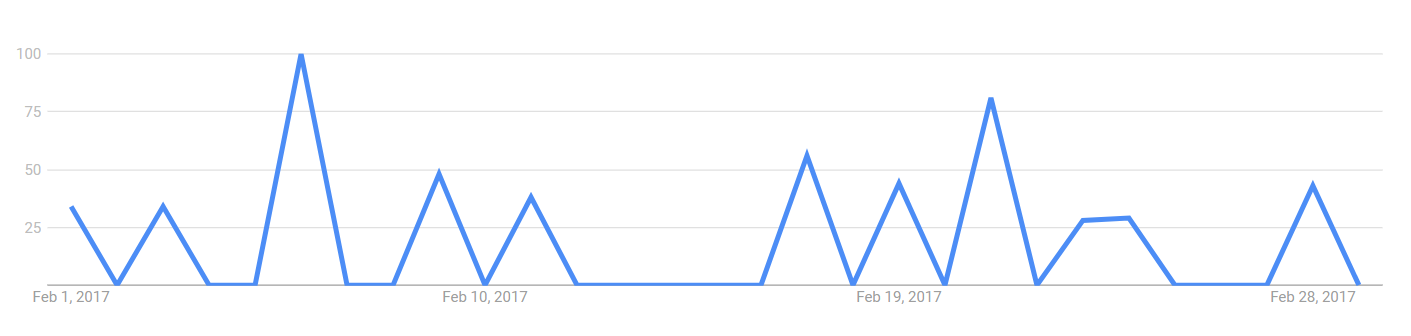

In March 2017, 11 instances of higher outliers were identified, which were dated 2017-03-06 and 2017-03-07. The specific data points are outlined below:

2017-03-06 12:45:00+00:00  7.4375

2017-03-06 13:00:00+00:00  7.4375

2017-03-06 13:15:00+00:00  7.4375

2017-03-06 13:30:00+00:00  7.4375

2017-03-06 13:45:00+00:00  7.4294

2017-03-06 14:00:00+00:00  7.4294

2017-03-07 06:45:00+00:00  7.4535

2017-03-07 07:00:00+00:00  7.4294

2017-03-07 07:15:00+00:00  7.4615

2017-03-07 07:30:00+00:00  7.4375

2017-03-07 07:45:00+00:00  7.4455



##### Plotted Data
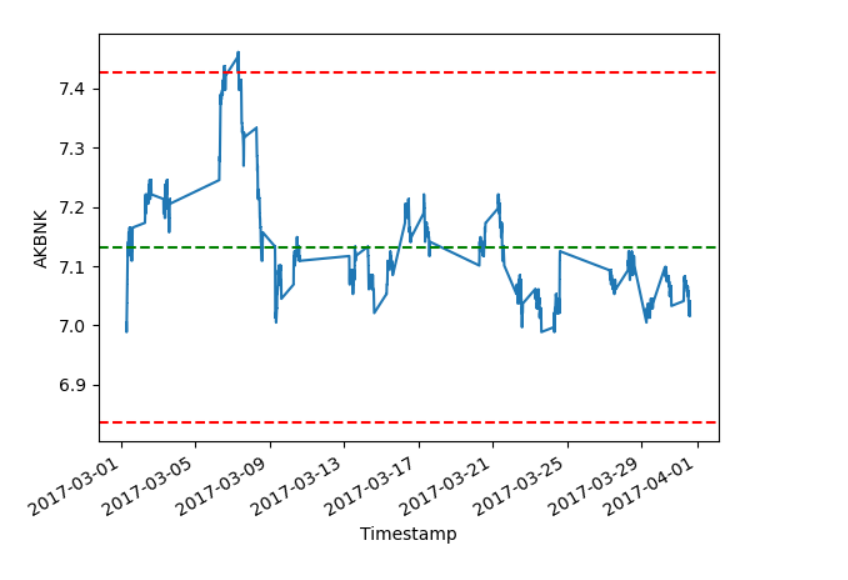
##### Google Trend Data
![gdsşg.PNG](attachment:gdsşg.PNG)

On the relevant dates, Fitch Ratings' publication regarding Akbank's Basel III compliant capital similar US Dollar-denominated bonds could potentially have a positive impact on Akbank's stock prices for several reasons. Firstly, a favorable rating from a well-regarded credit rating agency like Fitch can bolster investor confidence in the bank's financial stability and creditworthiness. This increased confidence can attract more investors to purchase Akbank's stocks, generating heightened demand and the possibility of an upward trajectory in stock prices.

In October 2017, 9 instances of lower outliers were identified, which were dated 2017-10-09. The specific data points are outlined below:

2017-10-09 07:00:00+00:00  7.3946

2017-10-09 07:30:00+00:00  7.4357

2017-10-09 07:45:00+00:00  7.4439

2017-10-09 08:00:00+00:00  7.4357

2017-10-09 08:15:00+00:00  7.4192

2017-10-09 08:30:00+00:00  7.4275

2017-10-09 08:45:00+00:00  7.4192

2017-10-09 09:00:00+00:00  7.4275

2017-10-09 09:15:00+00:00  7.4357



##### Plotted Data
![gşlkdfg.PNG](attachment:gşlkdfg.PNG)
##### Google Trend Data
![bgödfig.PNG](attachment:bgödfig.PNG)

The agreement that happened on this date between Karsan and Akbank for a credit facility of 25 million euros might negatively impact Akbank's stock prices for several reasons. Firstly, extending a substantial credit facility to Karsan poses potential financial risks to Akbank if Karsan encounters challenges in repaying the loan, potentially affecting the bank's asset quality and exposing it to credit risk. Such risks could raise concerns among investors and contribute to a decrease in Akbank's stock prices.

Additionally, unfavorable terms in the agreement, such as unattractive interest rates or a repayment schedule that does not favor Akbank, could impact the bank's profitability. If the terms do not adequately account for the associated risks, this could further diminish investor confidence and lead to a decline in Akbank's stock prices.

Furthermore, if the market perceives the agreement with Karsan as an indication of increased credit risk for Akbank or a deviation from its standard risk management practices, this could undermine investor confidence and negatively impact the bank's stock prices.

In summary, the potential financial risks linked to the credit facility agreement with Karsan could erode investor sentiment and the perceived financial stability of Akbank, consequently contributing to a decrease in its stock prices.

### References
https://uzmanpara.milliyet.com.tr/

https://www.investing.com/

https://uzmanpara.milliyet.com.tr/kap-haberi/aksa-aksa-akrilik-kimya-sanayii-a-s--olagan-disi-fiyat-ve-miktar-hareketleri/1096108/

https://uzmanpara.milliyet.com.tr/raporlar-analizler/aksa-akrilik-kimya--geri-alim-programi-acikladi/1101133/

https://uzmanpara.milliyet.com.tr/raporlar-analizler/spk--sise-camin-borclanma-araci-ihracini-onayladi/1093558/

https://uzmanpara.milliyet.com.tr/raporlar-analizler/sisecamin-mersindeki-yeni-yatirimiyla-turkiyedeki-cam-ambalaj-kapasitesi-1-3-milyon-tona-yukselecek/1174128/ 